The work done by <b> Bakhtiyar Rakhimzhanov </b>

Content:
1. Importing libraries
2. Data description
3. Web scraping
4. Data preparation: cleaning
5. Analysis
6. Data preprocessing
7. Prediction models

I will scrap the apartments for rent in Kostanay, as I live there now. I'm going to scrap the city, owner name,house information, house type, area, price, phone and the links to the apartments. The packages for use: selenium, bs4.

In [1]:
#!pip install selenium

### Importing libraries

In [2]:
# Importing libraries
from selenium import webdriver
import time
from time import sleep
from bs4 import BeautifulSoup

### Data description
1. City : it is the city where apartment is located
2. Price : the money that you need to spend in order to rent the house 
3. Room_Num : the room number in the apartment
4. Floor_Num : the floor at which the apartment is stayed
5. Area : the area of the apartment
6. Description : general information about the apartments for rent
7. Author : the person who posted the apartment
8. Link : the link to the apartment

### Web scraping

In [3]:
# Using selenium to scrap the links
driver = webdriver.Chrome(executable_path = r'C:\Users\Admin\Desktop\5 trimester\data_mining\HW5\chromedriver.exe')
url = []
# Getting only first five pages
for x in range(1,6):
    urls = 'https://krisha.kz/arenda/kvartiry/kostanaj/?das[rent.period]=2&'+ 'page='+str(x)
    driver.get(urls)
    # Scraping all links in one page
    links = driver.find_elements_by_xpath("//a[contains(@class,'a-card__title ')]")
    for x in links:
        # getting the links in href format
        linkers = x.get_attribute('href')
        #append them in list
        url.append(linkers)

In [4]:
# Lists that will be used for saving data
city = []
owner = []
house_general = []
area = []
price = []
phone = []
urls = []

In [5]:
import requests
for x in url:
    r = requests.get(x)
    soup = BeautifulSoup(r.content, 'html.parser')
    # Getting owner
    get_name = soup.find('div', {'class' : 'owners__name'}).text
    owner.append(get_name)
    # Getting the description
    get_info = soup.find("h1").text.strip()
    house_general.append(get_info)
    # Getting the phone number
    get_num = soup.find('span', {'class' : 'phone'}).text
    get_nums = soup.find('span', {'class' : 'show-phones'})['data-id']
    get_phone = get_num + get_nums
    phone.append(get_phone)
    # Getting the price 
    get_price = soup.find('div', {'class' : 'offer__price'}).text.strip()
    get_price = get_price.split('\xa0')
    get_price = get_price[0]+get_price[1]
    price.append(int(get_price))
    # Getting the links
    get_link = x
    urls.append(get_link)
    # Getting the city name
    city_name = soup.find('div', {'class' : 'offer__location offer__advert-short-info'}).text.strip()
    city_name = city_name.split(',')[0]
    city.append(city_name)
    # Getting the area info
    area_info = get_info.split(',')[1].strip()
    areas = area_info.split(' ')[0]
    area.append(areas)

In [6]:
# Confirming the length of the lists
print(len(area))
print(len(city))
print(len(price))
print(len(phone))
print(len(house_general))
print(len(owner))
print(len(urls))


100
100
100
100
100
100
100


In [7]:
# Creating and saving data in form of dataset
import pandas as pd
#Creating the dataframe
df = pd.DataFrame()
# Creating the columns and assigning the data from lists
df['City'] = city
df['Description'] = house_general
df['Price'] =  price
df['Area'] = area
df['Author'] = owner
df['Phone'] = phone
df['Link'] = urls
#The way to save data from lists into excel file
df.to_excel('hm5.xlsx',index = False)
# Reading the file itself
df = pd.read_excel('hm5.xlsx')
df

,City,Description,Price,Area,Author,Phone,Link
0,Костанай,"4-комнатная квартира, 72 м², 2/6 этаж помесячн...",100000,72.0,Хозяин недвижимости,+7 708 665809750,https://krisha.kz/a/show/665809750
1,Костанай,"3-комнатная квартира, 72 м², 7/9 этаж помесячн...",115000,72.0,Хозяин недвижимости,+7 777 661468548,https://krisha.kz/a/show/661468548
2,Костанай,"2-комнатная квартира, 60 м², 3/5 этаж помесячн...",150000,60.0,Хозяин недвижимости,+7 777 663940895,https://krisha.kz/a/show/663940895
3,Костанай,"2-комнатная квартира, 53 м², 4/6 этаж помесячн...",80000,53.0,Хозяин недвижимости,+7 702 665996042,https://krisha.kz/a/show/665996042
4,Костанай,"2-комнатная квартира, 56 м², 6/6 этаж помесячн...",80000,56.0,Хозяин недвижимости,+7 705 665995773,https://krisha.kz/a/show/665995773
...,...,...,...,...,...,...,...
95,Костанай,"3-комнатная квартира, 90 м², 2/2 этаж помесячн...",150000,90.0,Хозяин недвижимости,+7 777 51472154,https://krisha.kz/a/show/51472154
96,Костанай,"1-комнатная квартира, 34 м², 5/6 этаж помесячн...",80000,34.0,Хозяин недвижимости,+7 775 665738755,https://krisha.kz/a/show/665738755
97,Костанай,"1-комнатная квартира, 35 м², 3/5 этаж помесячн...",65000,35.0,Хозяин недвижимости,+7 702 661077990,https://krisha.kz/a/show/661077990
98,Костанай,"1-комнатная квартира, 35 м², 3/5 этаж помесячн...",70000,35.0,Хозяин недвижимости,+7 777 665907646,https://krisha.kz/a/show/665907646


### Data cleaning

In [8]:
# Dropping unuseful columns
df.drop(['City','Author','Link'],inplace = True,axis = 1)

In [9]:
# Getting the room number from description column
df['Room_num'] = df['Description'].str.split('-',n=1,expand = True)[0]
# Getting the floor number from description column
df['Floor_Num'] = df['Description'].str.split('/', n = 1,expand = True)[0].str.split('м²,', n = 1, expand = True)[1]
# Dropping Description column after getting necessary information
df.drop(['Description'],axis = 1,inplace = True)

### Data analysis 

In [10]:
# Counting the mobile operators 
count_Beel = 0
count_Altel = 0
count_Tele2 = 0
count_Kcell = 0
beel = [705,777,776,771]
altel = [700,708]
tele2 = [747,707]
kcell = [701,702,775,778]
for x in df.Phone:
    separator = int(x.split(' ')[1])
    if separator in beel:
        count_Beel+=1
    elif separator in altel:
        count_Altel+=1
    elif separator in kcell:
        count_Kcell+=1
    elif separator in tele2:
        count_Tele2+=1
print('The number of authors with Beeline operator: '+ str(count_Beel))
print('The number of authors with Altel operator: ' + str(count_Altel))
print('The number of authors with Kcell operator: '+ str(count_Kcell))
print('The number of authors with Tele2 operator: ' + str(count_Tele2))

The number of authors with Beeline operator: 56
The number of authors with Altel operator: 7
The number of authors with Kcell operator: 23
The number of authors with Tele2 operator: 14


In [11]:
# Changing the datatypes of columns
df['Room_num'] = df['Room_num'].astype(int)
df['Floor_Num'] = df['Floor_Num'].str.split(' этаж', n = 1,expand = True)[0].str.strip()
# Filling the NaN values with 0 if any
df['Floor_Num'] = df['Floor_Num'].fillna(0)
df['Floor_Num'] = df['Floor_Num'].astype(int)
# Showing descriptive statistics
df.describe()

,Price,Area,Room_num,Floor_Num
count,100.000000,100.000000,100.000000,100.000000
mean,92375.000000,48.637000,1.720000,3.360000
std,36113.343948,20.948121,0.779536,1.982346
min,36500.000000,11.000000,1.000000,0.000000
25%,70000.000000,34.000000,1.000000,2.000000
50%,80000.000000,47.500000,2.000000,3.000000
75%,100000.000000,57.250000,2.000000,5.000000
max,270000.000000,180.000000,4.000000,10.000000


In [12]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Showing the correlation between variables
df.corr()

,Price,Area,Room_num,Floor_Num
Price,1.000000,0.576797,0.484389,0.050372
Area,0.576797,1.000000,0.792710,0.186219
Room_num,0.484389,0.792710,1.000000,0.196620
Floor_Num,0.050372,0.186219,0.196620,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


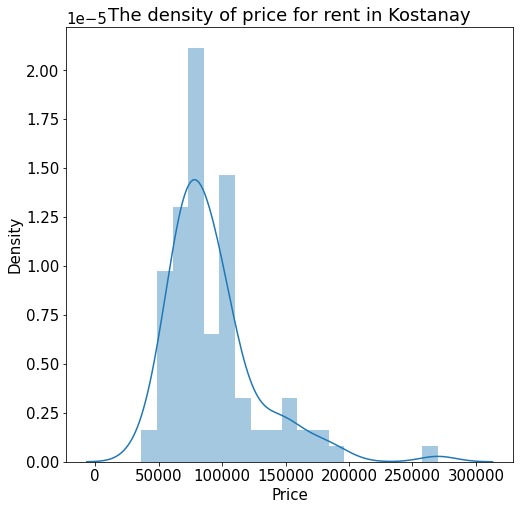

In [22]:
# The density of price for rent in Kostanay city
fig, ax = plt.subplots( figsize = (8,8))
sns.distplot(x = df['Price'])
plt.title('The density of price for rent in Kostanay')
plt.xlabel('Price')
plt.rcParams['font.size'] = 15
plt.show()

We can see that price for rent in Kostanay is positively distributed

<b>Conclusion:</b> <br>
There are 100 houses for rent in Kostanay in that dataset.<br>
The average price for rent is 92375 tenge. <br>
The average amount of area is 48.63 m^2.<br>
There is a positive relationship between area and price. <br>
The most of the post authors has a Beeline mobile operator. <br>
Finally, price for rent in Kostanay is positively distributed. <br>

### Prediction models ( Linear Regression)

### Doing initial prediction without preprocessing

In [20]:
# Making linear regression prediction for the rent price based on room, floor, year and area
from sklearn.model_selection import train_test_split
X = df[['Room_num','Area','Floor_Num']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)
# Creating linear regression
from sklearn.linear_model import LinearRegression
pred = LinearRegression()
# Training our data
pred.fit(X_train, y_train)
# Watching how our independent variables will affect on the price value
print(pred.coef_)
# Making predictions
y_pred = pred.predict(X_test)
# Watching the results
df_without = pd.DataFrame({'Now': y_test, 'Without': y_pred})
from sklearn import metrics
y1_score = metrics.r2_score(y_test,y_pred)
print('R2 square without preprocessing',y1_score)

[ 2827.52859482 17528.61250183 -1313.06654187]
R2 square without preprocessing 0.6687795397355578


### Data preprocessing (Standardization) and prediction

In [21]:
from sklearn.preprocessing import StandardScaler
df[['Room_num','Floor_Num','Area']] = StandardScaler().fit_transform(df[['Room_num','Floor_Num','Area']])
X = df[['Room_num','Area','Floor_Num']]
y = df['Price']
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.2,random_state = 0)
# Creating linear regression
pred = LinearRegression()
# Training our data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
pred.fit(X_train, y_train)
# Watching how our independent variables will affect on the price value
print(pred.coef_)
# Making predictions
y_pred = pred.predict(X_test)
y2_score = metrics.r2_score(y_test1,y_pred)
print('R2 square without preprocessing',y2_score)

[ 2799.7650177  18360.23245785 -1345.40306153]
R2 square without preprocessing 0.7369322202631241


<b> Overall conclusion:</b><br>
There were lots of analysis done. Before getting started there were data cleaning process. By given work, we can conclude model that have preprocessing can give us better results for the linear regression, as it is bigger than without preprocessing.